In [13]:
# ==== Bước 1: Cài đặt thư viện ====
%env PIP_DISABLE_PIP_VERSION_CHECK=1
%env PIP_NO_WARN_SCRIPT_LOCATION=0

!pip -q install --upgrade --force-reinstall \
  numpy==2.1.3 scipy==1.14.1 pandas==2.2.2 \
  scikit-learn==1.6.1 imbalanced-learn==0.14.0 \
  lightgbm==4.6.0 catboost==1.2.8 joblib==1.4.2 matplotlib==3.9.2



env: PIP_DISABLE_PIP_VERSION_CHECK=1
env: PIP_NO_WARN_SCRIPT_LOCATION=0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.49.1 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


In [1]:
# ==== Bước 3: Import và xác minh (sau khi khởi động lại) ====
import numpy, scipy, pandas, sklearn, lightgbm, catboost, matplotlib
print("numpy", numpy.__version__,
      "| scipy", scipy.__version__,
      "| pandas", pandas.__version__,
      "| sklearn", sklearn.__version__,
      "| lightgbm", lightgbm.__version__,
      "| catboost", catboost.__version__,
      "| matplotlib", matplotlib.__version__)

numpy 2.1.3 | scipy 1.14.1 | pandas 2.2.2 | sklearn 1.6.1 | lightgbm 4.6.0 | catboost 1.2.8 | matplotlib 3.9.2


In [2]:


from pathlib import Path
import os, json, time, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# --- Fixed paths (as requested) ---
DATA_PATH = "/content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode/UCI_Credit_Card.csv"
ROOT      = "/content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode"

print("ROOT     :", ROOT)
print("DATA_PATH:", DATA_PATH)


Mounted at /content/drive
ROOT     : /content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode
DATA_PATH: /content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode/UCI_Credit_Card.csv


Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,3,90000.000000,2,2,2,34,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0


Positive rate BEFORE preprocessing (default=1): 0.2212


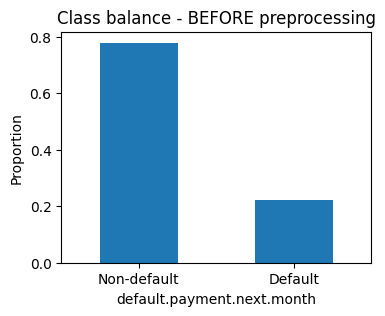

,column,role,dtype,na_pct
0,AGE,feature,int64,0.000000
1,BILL_AMT1,feature,float64,0.000000
2,BILL_AMT2,feature,float64,0.000000
3,BILL_AMT3,feature,float64,0.000000
4,BILL_AMT4,feature,float64,0.000000
5,BILL_AMT5,feature,float64,0.000000
6,BILL_AMT6,feature,float64,0.000000
7,EDUCATION,feature,int64,0.000000
8,LIMIT_BAL,feature,float64,0.000000
9,MARRIAGE,feature,int64,0.000000


NA any? -> False


,column,include,reason
0,LIMIT_BAL,True,Domain + published baseline (credit risk)
1,SEX,True,Domain + published baseline (credit risk)
2,EDUCATION,True,Domain + published baseline (credit risk)
3,MARRIAGE,True,Domain + published baseline (credit risk)
4,AGE,True,Domain + published baseline (credit risk)
5,PAY_0,True,Domain + published baseline (credit risk)
6,PAY_2,True,Domain + published baseline (credit risk)
7,PAY_3,True,Domain + published baseline (credit risk)
8,PAY_4,True,Domain + published baseline (credit risk)
9,PAY_5,True,Domain + published baseline (credit risk)



SEX value counts (BEFORE):


,count
SEX,
1,11888
2,18112



EDUCATION value counts (BEFORE):


,count
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51



MARRIAGE value counts (BEFORE):


,count
MARRIAGE,
0,54
1,13659
2,15964
3,323



PAY_0 value counts (BEFORE):


,count
PAY_0,
-2,2759
-1,5686
0,14737
1,3688
2,2667
3,322
4,76
5,26
6,11



PAY_2 value counts (BEFORE):


,count
PAY_2,
-2,3782
-1,6050
0,15730
1,28
2,3927
3,326
4,99
5,25
6,12



PAY_3 value counts (BEFORE):


,count
PAY_3,
-2,4085
-1,5938
0,15764
1,4
2,3819
3,240
4,76
5,21
6,23



PAY_4 value counts (BEFORE):


,count
PAY_4,
-2,4348
-1,5687
0,16455
1,2
2,3159
3,180
4,69
5,35
6,5



PAY_5 value counts (BEFORE):


,count
PAY_5,
-2,4546
-1,5539
0,16947
2,2626
3,178
4,84
5,17
6,4
7,58



PAY_6 value counts (BEFORE):


,count
PAY_6,
-2,4895
-1,5740
0,16286
2,2766
3,184
4,49
5,13
6,19
7,46



EDUCATION value counts (AFTER mapping):


,count
EDUCATION,
1,10585
2,14030
3,4917
4,468



MARRIAGE value counts (AFTER mapping):


,count
MARRIAGE,
1,13659
2,15964
3,377



QUALITY REPORT: {'has_na_any': False, 'n_duplicates': 0, 'n_numeric': 25, 'n_categorical_candidate': 9}


,note
0,No NA detected; imputation not required


Positive rate AFTER preprocessing-lite: 0.2212


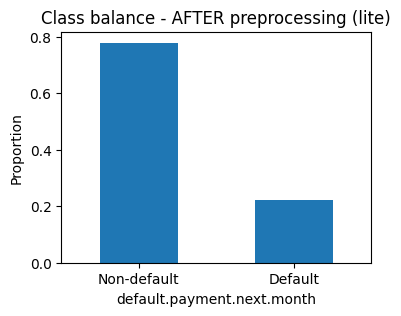

,split,n_rows,pos_rate
0,Train,21000,0.221238
1,Valid,4500,0.221111
2,Test,4500,0.221111
3,Total,30000,0.221200


- Records: 30000; Features (before drop ID): 23; Target positive rate (before): 22.12%, (after): 22.12%.
- Variables included: LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0..PAY_6, BILL_AMT1..6, PAY_AMT1..6; Exclude: ID (identifier).
- Data quality: No missing values; EDUCATION {0,4,5,6}->4 (others), MARRIAGE {0}->3 (others); PAY_* clipped to [-2,9] if needed.
- Imputation plan (if NA later): numeric=median, categorical=most_frequent (in sklearn Pipeline).
- Split: stratified 70/15/15 (Train/Valid/Test) with random_state=42.


In [10]:
# =========================
# CAB330 - Task 1 (Credit Risk)
# Data Selection & Distribution
# =========================

TARGET = "default.payment.next.month"  # 1=default, 0=non-default
ID_COL = "ID"

# 1) Load data ---------------------------------------------------------------
assert Path(DATA_PATH).exists(), f"Không tìm thấy file: {DATA_PATH}"
df_raw = pd.read_csv(DATA_PATH)
df = df_raw.copy()

print("Shape:", df.shape)
display(df.head(3))

# 2) Class balance (BEFORE preprocessing) -----------------------------------
pos_rate_before = df[TARGET].mean()
print(f"Positive rate BEFORE preprocessing (default=1): {pos_rate_before:.4f}")

fig, ax = plt.subplots(figsize=(4,3))
(df[TARGET].value_counts(normalize=True)
   .rename({0:"Non-default",1:"Default"})
   .plot(kind="bar", rot=0, ax=ax))
ax.set_title("Class balance - BEFORE preprocessing")
ax.set_ylabel("Proportion")
plt.show()

# 3) Schema (role, dtype, %NA) ----------------------------------------------
schema_rows = []
for c in df.columns:
    role = "feature"
    if c == ID_COL: role = "id"
    if c == TARGET: role = "target"
    schema_rows.append({
        "column": c,
        "role": role,
        "dtype": str(df[c].dtype),
        "na_pct": round(df[c].isna().mean(), 4)
    })
schema_df = pd.DataFrame(schema_rows).sort_values(["role","column"]).reset_index(drop=True)
display(schema_df)
print("NA any? ->", schema_df["na_pct"].gt(0).any())

# 4) Variable selection (keep/drop + reason) ---------------------------------
all_features = [c for c in df.columns if c not in [ID_COL, TARGET]]
select_df = pd.DataFrame({
    "column": all_features + [ID_COL],
    "include": [True]*len(all_features) + [False],
    "reason":  (["Domain + published baseline (credit risk)"]*len(all_features)) + ["Identifier (no predictive signal)"]
})
display(select_df)

# 5) Data quality checks & light fixes ---------------------------------------
quality_report = {}
quality_report["has_na_any"]  = bool(df.isna().any().any())
quality_report["n_duplicates"] = int(df.duplicated(subset=[ID_COL]).sum())

# (a) Show raw value counts for discrete fields (before mapping)
disc_cols = ["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for c in disc_cols:
    print(f"\n{c} value counts (BEFORE):")
    display(df[c].value_counts().sort_index())

# (b) Map EDUCATION/MARRIAGE anomalies to 'others'
df["EDUCATION"] = df["EDUCATION"].replace({0:4, 4:4, 5:4, 6:4})  # -> 4 (others)
df["MARRIAGE"]  = df["MARRIAGE"].replace({0:3})                  # -> 3 (others)

# (c) Clip PAY_* to [-2,9] if any out-of-range
pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for c in pay_cols:
    bad = (~df[c].between(-2,9)).sum()
    if bad:
        print(f"Clipping {c}: {bad} values outside [-2,9]")
        df[c] = df[c].clip(-2, 9)

# (d) Show value counts AFTER mapping to make cleaning verifiable
for c in ["EDUCATION","MARRIAGE"]:
    print(f"\n{c} value counts (AFTER mapping):")
    display(df[c].value_counts().sort_index())

# Numeric vs categorical candidates (for reporting)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in ["SEX","EDUCATION","MARRIAGE"] + pay_cols if c in df.columns]
quality_report["n_numeric"] = len(num_cols)
quality_report["n_categorical_candidate"] = len(cat_cols)
print("\nQUALITY REPORT:", quality_report)

# 6) Imputation plan (no actual impute here; will be done in Pipeline later) --
na_cols = df.columns[df.isna().any()].tolist()
if na_cols:
    impute_plan = []
    for c in na_cols:
        if pd.api.types.is_numeric_dtype(df[c]):
            impute_plan.append({"column": c, "strategy": "median", "why": "robust to outliers"})
        else:
            impute_plan.append({"column": c, "strategy": "most_frequent", "why": "keeps valid category"})
    impute_df = pd.DataFrame(impute_plan)
    display(impute_df)
else:
    display(pd.DataFrame([{"note":"No NA detected; imputation not required"}]))

# 7) Class balance (AFTER light preprocessing) --------------------------------
pos_rate_after = df[TARGET].mean()
print(f"Positive rate AFTER preprocessing-lite: {pos_rate_after:.4f}")

fig, ax = plt.subplots(figsize=(4,3))
(df[TARGET].value_counts(normalize=True)
   .rename({0:"Non-default",1:"Default"})
   .plot(kind="bar", rot=0, ax=ax))
ax.set_title("Class balance - AFTER preprocessing (lite)")
ax.set_ylabel("Proportion")
plt.show()

# 8) Stratified split 70/15/15 ------------------------------------------------
from sklearn.model_selection import train_test_split
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
# valid ≈ 15% tổng: 0.15/0.85 ≈ 0.17647
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.17647, stratify=y_temp, random_state=42
)

split_report = pd.DataFrame({
    "split": ["Train","Valid","Test","Total"],
    "n_rows": [len(X_train), len(X_valid), len(X_test), len(df)],
    "pos_rate": [y_train.mean(), y_valid.mean(), y_test.mean(), y.mean()]
})
display(split_report)


# 10) Summary lines for report ------------------------------------------------
summary_lines = [
    f"- Records: {len(df)}; Features (before drop ID): {len(all_features)}; Target positive rate (before): {pos_rate_before:.2%}, (after): {pos_rate_after:.2%}.",
    "- Variables included: LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0..PAY_6, BILL_AMT1..6, PAY_AMT1..6; Exclude: ID (identifier).",
    "- Data quality: No missing values; EDUCATION {0,4,5,6}->4 (others), MARRIAGE {0}->3 (others); PAY_* clipped to [-2,9] if needed.",
    "- Imputation plan (if NA later): numeric=median, categorical=most_frequent (in sklearn Pipeline).",
    "- Split: stratified 70/15/15 (Train/Valid/Test) with random_state=42.",
]
print("\n".join(summary_lines))



Shapes: (21000, 24) (4500, 24) (4500, 24)
Pos rate (Train/Valid/Test): 0.221 0.221 0.221
[LightGBM] [Info] Number of positive: 4646, number of negative: 16354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3517
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221238 -> initscore=-1.258466
[LightGBM] [Info] Start training from score -1.258466
LightGBM metrics


,Accuracy,ROC_AUC,PR_AUC,Brier
Train,0.785333,0.840595,0.602180,0.161966
Valid,0.774889,0.785941,0.573555,0.169214
Test,0.769556,0.782856,0.555635,0.172433


[LightGBM] Trees=62  MaxDepth=18  TotalLeaves=1922  (best_iter=62)
First-split feature (LightGBM tree #0): PAY_0
Top-5 features (LightGBM, gain):


,gain_importance
PAY_0,48124.814818
PAY_2,12034.270899
PAY_AMT2,6232.399850
LIMIT_BAL,5609.986521
BILL_AMT1,5275.311701


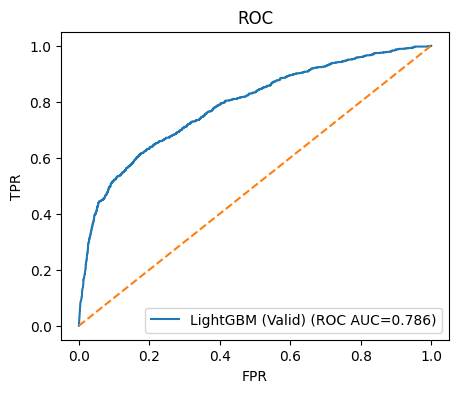

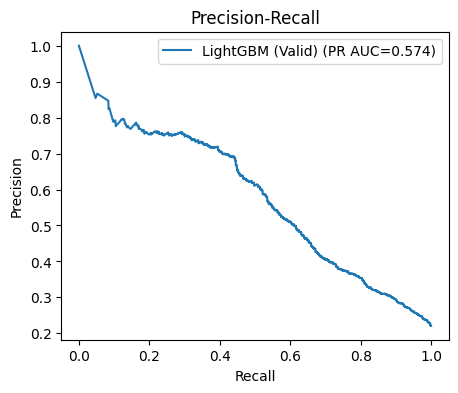

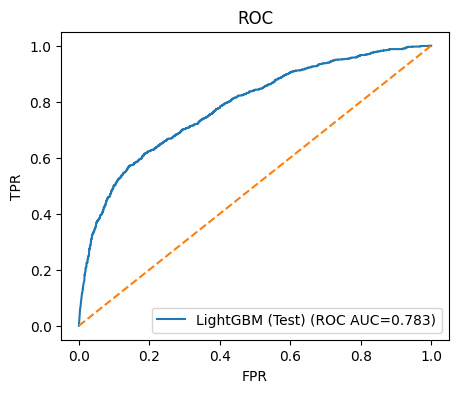

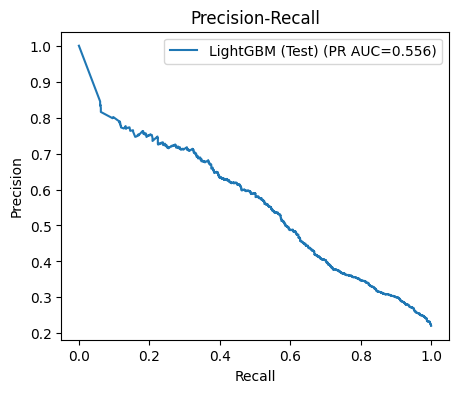

[LightGBM] θ* (Valid) = 0.260 | Cost_Valid=3124 | Cost_Test=3043
Best params (CatBoost / GridSearchCV):


,0
depth,6.00
iterations,500.00
l2_leaf_reg,1.00
learning_rate,0.03


CatBoost metrics


,Accuracy,ROC_AUC,PR_AUC,Brier
Train,0.787095,0.841169,0.636661,0.162234
Valid,0.777111,0.785544,0.570450,0.171001
Test,0.770000,0.784259,0.565029,0.174510


[CatBoost] iterations=428, depth=6
Top-5 features (CatBoost):


,pred_values_change
PAY_0,19.289619
LIMIT_BAL,8.304562
BILL_AMT1,7.112672
PAY_AMT3,4.330167
PAY_AMT2,4.312000


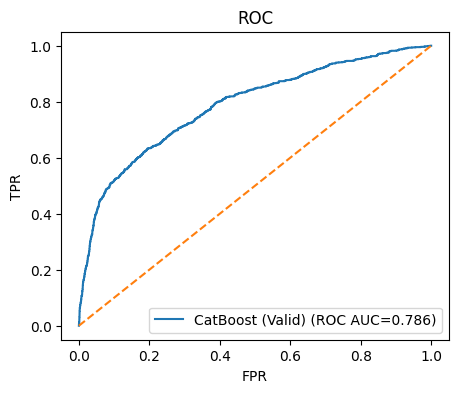

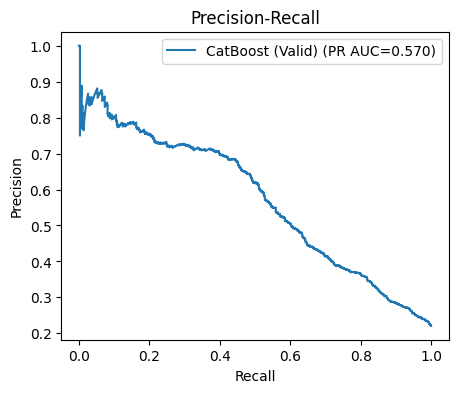

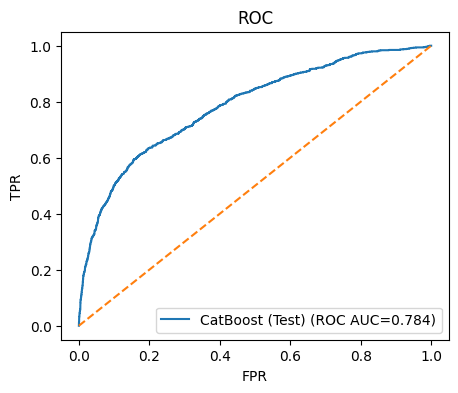

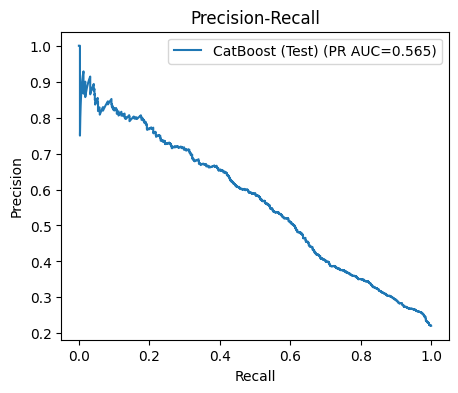

[CatBoost] θ* (Valid) = 0.238 | Cost_Valid=3155 | Cost_Test=3063
So sánh metrics:


Accuracy   ROC_AUC    PR_AUC     Brier
LightGBM Valid  0.774889  0.785941  0.573555  0.169214
         Test   0.769556  0.782856  0.555635  0.172433
CatBoost Valid  0.777111  0.785544  0.570450  0.171001
         Test   0.770000  0.784259  0.565029  0.174510

Expected Cost (C_FN=10, C_FP=1):


,θ*_Valid,Cost_Valid,Cost_Test
LightGBM,0.260,3124.0,3043.0
CatBoost,0.238,3155.0,3063.0


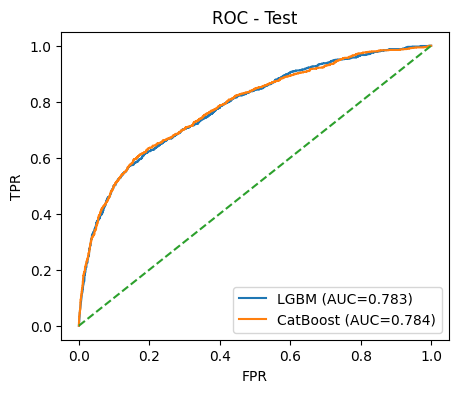

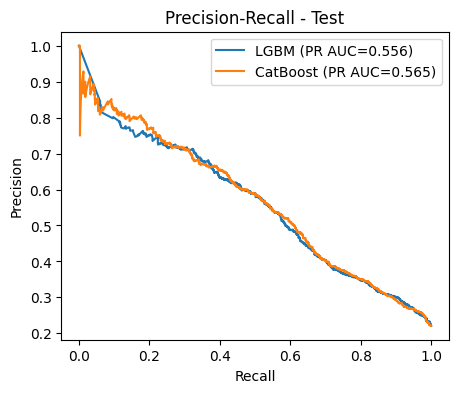

In [4]:
# =========================
# CAB330 - Task 2 (Boosting)
# LightGBM vs CatBoost (Credit Risk)
# =========================

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    brier_score_loss, precision_recall_curve, roc_curve
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

import lightgbm as lgb
from catboost import CatBoostClassifier

plt.rcParams["figure.figsize"] = (5,4)

# =========================
# 0) Đọc/sinh dữ liệu đầu vào (nếu Task 1 chưa chạy)
# =========================
DATA_PATH = "/content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode/UCI_Credit_Card.csv"
TARGET = "default.payment.next.month"
ID_COL = "ID"

def get_splits_if_missing():
    global X_train, X_valid, X_test, y_train, y_valid, y_test
    have_all = all(k in globals() for k in ["X_train","X_valid","X_test","y_train","y_valid","y_test"])
    if have_all:
        return
    # Load + preprocess lite giống Task 1
    assert Path(DATA_PATH).exists(), f"Không thấy file: {DATA_PATH}"
    df = pd.read_csv(DATA_PATH)
    # Chuẩn hoá EDUCATION/MARRIAGE theo mô tả
    df["EDUCATION"] = df["EDUCATION"].replace({0:4, 4:4, 5:4, 6:4})
    df["MARRIAGE"]  = df["MARRIAGE"].replace({0:3})
    # Clip dải PAY_* về [-2,9] (phòng out-of-range)
    for c in ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]:
        if c in df.columns:
            df[c] = df[c].clip(-2, 9)
    # Chọn features
    feats = [c for c in df.columns if c not in [ID_COL, TARGET]]
    X = df[feats].copy()
    y = df[TARGET].astype(int).copy()
    # Split 70/15/15 stratified
    X_tmp, X_test_, y_tmp, y_test_ = train_test_split(
        X, y, test_size=0.15, stratify=y, random_state=42
    )
    X_train_, X_valid_, y_train_, y_valid_ = train_test_split(
        X_tmp, y_tmp, test_size=0.17647, stratify=y_tmp, random_state=42
    )
    X_train, X_valid, X_test = X_train_, X_valid_, X_test_
    y_train, y_valid, y_test  = y_train_, y_valid_, y_test_

get_splits_if_missing()

print("Shapes:", X_train.shape, X_valid.shape, X_test.shape)
print("Pos rate (Train/Valid/Test):",
      f"{y_train.mean():.3f}", f"{y_valid.mean():.3f}", f"{y_test.mean():.3f}")

# =========================
# 1) Helpers: metrics, threshold theo chi phí, vẽ ROC/PR
# =========================
def metrics_from_proba(y_true, p):
    """Tính các thước đo từ xác suất lớp 1."""
    y_pred = (p >= 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, p),
        "PR_AUC": average_precision_score(y_true, p),
        "Brier": brier_score_loss(y_true, p)
    }

def find_best_threshold_by_cost(y_true, p, c_fn=10.0, c_fp=1.0):
    """Tìm ngưỡng t tối ưu Expected Cost = c_fn*FN + c_fp*FP (grid 0..1)."""
    thr = np.linspace(0,1,501)
    best_t, best_cost = 0.5, np.inf
    for t in thr:
        y_hat = (p >= t).astype(int)
        FP = ((y_true==0) & (y_hat==1)).sum()
        FN = ((y_true==1) & (y_hat==0)).sum()
        cost = c_fn*FN + c_fp*FP
        if cost < best_cost:
            best_cost, best_t = cost, t
    return best_t, best_cost

def plot_roc_pr(y_true, p, label_prefix="Model"):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, p)
    auc = roc_auc_score(y_true, p)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{label_prefix} (ROC AUC={auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC"); plt.legend(); plt.show()
    # PR
    prec, rec, _ = precision_recall_curve(y_true, p)
    ap = average_precision_score(y_true, p)
    plt.figure()
    plt.plot(rec, prec, label=f"{label_prefix} (PR AUC={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall"); plt.legend(); plt.show()

# Class imbalance weights
pos = int(y_train.sum())
neg = len(y_train) - pos
scale_pos_weight = neg / max(pos, 1)              # cho LightGBM
class_weights_cb = [1.0, scale_pos_weight]        # cho CatBoost: [w0, w1]

# =========================
# 2) Model A – LightGBM (baseline + early stopping)
# =========================
params_lgb = dict(
    objective="binary",
    learning_rate=0.05,
    n_estimators=2000,             # lớn để early-stopping cắt sớm
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    metric="None"                  # dùng sklearn metrics bên ngoài
)
lgb_clf = lgb.LGBMClassifier(**params_lgb)

lgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
)

p_tr_lgb = lgb_clf.predict_proba(X_train)[:,1]
p_va_lgb = lgb_clf.predict_proba(X_valid)[:,1]
p_te_lgb = lgb_clf.predict_proba(X_test)[:,1]

mt_lgb = pd.DataFrame(
    [metrics_from_proba(y_train, p_tr_lgb),
     metrics_from_proba(y_valid, p_va_lgb),
     metrics_from_proba(y_test,  p_te_lgb)],
    index=["Train","Valid","Test"]
)
print("LightGBM metrics")
display(mt_lgb)

# ---- Kích thước mô hình + first split + importance (đúng cấu trúc dump) ----
dump = lgb_clf.booster_.dump_model()
tree_infos = dump.get("tree_info", [])
n_trees = len(tree_infos)
total_leaves = sum(t.get("num_leaves", 0) for t in tree_infos)

def tree_max_depth(node):
    if not isinstance(node, dict):
        return 0
    if "leaf_value" in node:
        return 0
    d_left  = tree_max_depth(node.get("left_child"))
    d_right = tree_max_depth(node.get("right_child"))
    return 1 + max(d_left, d_right)

max_depth_global = 0
for t in tree_infos:
    st = t.get("tree_structure", {})
    max_depth_global = max(max_depth_global, tree_max_depth(st))

print(f"[LightGBM] Trees={n_trees}  MaxDepth={max_depth_global}  TotalLeaves={total_leaves}  "
      f"(best_iter={getattr(lgb_clf, 'best_iteration_', lgb_clf.n_estimators_)})")

first_split_name = None
if n_trees > 0:
    tree0 = tree_infos[0].get("tree_structure", {})
    split_idx_or_name = tree0.get("split_feature", None)
    feat_names = lgb_clf.booster_.feature_name()
    if isinstance(split_idx_or_name, int) and 0 <= split_idx_or_name < len(feat_names):
        first_split_name = feat_names[split_idx_or_name]
    else:
        first_split_name = split_idx_or_name
print("First-split feature (LightGBM tree #0):", first_split_name)

feat_names = lgb_clf.booster_.feature_name()
gain_importances = lgb_clf.booster_.feature_importance(importance_type='gain')
fi_lgb = (pd.Series(gain_importances, index=feat_names)
            .sort_values(ascending=False)
            .head(5)
            .to_frame("gain_importance"))
print("Top-5 features (LightGBM, gain):")
display(fi_lgb)

# Đồ thị ROC/PR
plot_roc_pr(y_valid, p_va_lgb, "LightGBM (Valid)")
plot_roc_pr(y_test,  p_te_lgb, "LightGBM (Test)")

# Ngưỡng tối ưu theo cost
C_FN, C_FP = 10.0, 1.0
theta_lgb, cost_va_lgb = find_best_threshold_by_cost(y_valid, p_va_lgb, C_FN, C_FP)
_,          cost_te_lgb = find_best_threshold_by_cost(y_test,  p_te_lgb, C_FN, C_FP)
print(f"[LightGBM] θ* (Valid) = {theta_lgb:.3f} | Cost_Valid={cost_va_lgb:.0f} | Cost_Test={cost_te_lgb:.0f}")

# =========================
# 3) Model B – CatBoost (GridSearchCV + early stopping)
# =========================
cb_base = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False,
    class_weights=class_weights_cb,
    random_seed=42
)

param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.06, 0.1],
    "l2_leaf_reg": [1, 3, 5],
    "iterations": [500, 800]  # sẽ dừng sớm nhờ early-stopping khi refit
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(
    estimator=cb_base,
    param_grid=param_grid,
    scoring="average_precision",   # tối ưu PR-AUC
    cv=cv,
    n_jobs=-1,
    refit=True
)
gscv.fit(X_train, y_train)
print("Best params (CatBoost / GridSearchCV):")
display(pd.Series(gscv.best_params_))

# Refit final với early-stopping trên Valid
cb_best = CatBoostClassifier(
    **gscv.best_params_,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False,
    class_weights=class_weights_cb,
    random_seed=42
)
cb_best.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    use_best_model=True,
    early_stopping_rounds=100,
    verbose=False
)

p_tr_cb = cb_best.predict_proba(X_train)[:,1]
p_va_cb = cb_best.predict_proba(X_valid)[:,1]
p_te_cb = cb_best.predict_proba(X_test)[:,1]

mt_cb = pd.DataFrame(
    [metrics_from_proba(y_train, p_tr_cb),
     metrics_from_proba(y_valid, p_va_cb),
     metrics_from_proba(y_test,  p_te_cb)],
    index=["Train","Valid","Test"]
)
print("CatBoost metrics")
display(mt_cb)

print(f"[CatBoost] iterations={cb_best.tree_count_}, depth={cb_best.get_param('depth')}")
fi_cb = pd.Series(cb_best.get_feature_importance(type="PredictionValuesChange"), index=X_train.columns)\
          .sort_values(ascending=False).head(5).to_frame("pred_values_change")
print("Top-5 features (CatBoost):")
display(fi_cb)

plot_roc_pr(y_valid, p_va_cb, "CatBoost (Valid)")
plot_roc_pr(y_test,  p_te_cb, "CatBoost (Test)")

theta_cb, cost_va_cb = find_best_threshold_by_cost(y_valid, p_va_cb, C_FN, C_FP)
_,        cost_te_cb = find_best_threshold_by_cost(y_test,  p_te_cb, C_FN, C_FP)
print(f"[CatBoost] θ* (Valid) = {theta_cb:.3f} | Cost_Valid={cost_va_cb:.0f} | Cost_Test={cost_te_cb:.0f}")

# =========================
# 4) So sánh tổng hợp + Vẽ ROC/PR chung trên Test
# =========================
metrics_table = pd.DataFrame({
    ("LightGBM","Valid"): mt_lgb.loc["Valid"].to_dict(),
    ("LightGBM","Test"):  mt_lgb.loc["Test"].to_dict(),
    ("CatBoost","Valid"): mt_cb.loc["Valid"].to_dict(),
    ("CatBoost","Test"):  mt_cb.loc["Test"].to_dict(),
}).T
print("So sánh metrics:")
display(metrics_table)

cost_table = pd.DataFrame({
    "θ*_Valid":  [theta_lgb, theta_cb],
    "Cost_Valid":[cost_va_lgb, cost_va_cb],
    "Cost_Test": [cost_te_lgb, cost_te_cb]
}, index=["LightGBM","CatBoost"])
print("Expected Cost (C_FN=10, C_FP=1):")
display(cost_table)

# ROC & PR – Test
plt.figure()
fpr_l,tpr_l,_ = roc_curve(y_test, p_te_lgb)
fpr_c,tpr_c,_ = roc_curve(y_test, p_te_cb)
plt.plot(fpr_l,tpr_l,label=f"LGBM (AUC={roc_auc_score(y_test,p_te_lgb):.3f})")
plt.plot(fpr_c,tpr_c,label=f"CatBoost (AUC={roc_auc_score(y_test,p_te_cb):.3f})")
plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - Test"); plt.legend(); plt.show()

prec_l,rec_l,_ = precision_recall_curve(y_test, p_te_lgb)
prec_c,rec_c,_ = precision_recall_curve(y_test, p_te_cb)
plt.figure()
plt.plot(rec_l,prec_l,label=f"LGBM (PR AUC={average_precision_score(y_test,p_te_lgb):.3f})")
plt.plot(rec_c,prec_c,label=f"CatBoost (PR AUC={average_precision_score(y_test,p_te_cb):.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall - Test"); plt.legend(); plt.show()


In [5]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, brier_score_loss
import numpy as np, pandas as pd

def metrics_from_proba(y_true, p):
    y_pred = (p >= 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, p),
        "PR_AUC": average_precision_score(y_true, p),
        "Brier": brier_score_loss(y_true, p)
    }

def find_best_threshold_by_cost(y_true, p, c_fn=10.0, c_fp=1.0):
    thr = np.linspace(0, 1, 501)
    best_t, best_cost = 0.5, np.inf
    for t in thr:
        y_hat = (p >= t).astype(int)
        FP = ((y_true==0) & (y_hat==1)).sum()
        FN = ((y_true==1) & (y_hat==0)).sum()
        cost = c_fn*FN + c_fp*FP
        if cost < best_cost:
            best_cost, best_t = cost, t
    return best_t, best_cost

# --- 1) Calibrate LightGBM (no retrain)
lgb_cal = CalibratedClassifierCV(lgb_clf, method="isotonic", cv="prefit")
lgb_cal.fit(X_valid, y_valid)
p_va_lgb_cal = lgb_cal.predict_proba(X_valid)[:,1]
p_te_lgb_cal = lgb_cal.predict_proba(X_test)[:,1]

mt_lgb_cal_va = metrics_from_proba(y_valid, p_va_lgb_cal)
mt_lgb_cal_te = metrics_from_proba(y_test,  p_te_lgb_cal)
theta_lgb_cal, cost_va_lgb_cal = find_best_threshold_by_cost(y_valid, p_va_lgb_cal, 10, 1)
_,                 cost_te_lgb_cal = find_best_threshold_by_cost(y_test,  p_te_lgb_cal, 10, 1)

print("LightGBM (calibrated) - Valid/Test")
display(pd.DataFrame([mt_lgb_cal_va, mt_lgb_cal_te], index=["Valid","Test"]))
print(f"θ* (Valid) = {theta_lgb_cal:.3f} | Cost_Valid={cost_va_lgb_cal:.0f} | Cost_Test={cost_te_lgb_cal:.0f}")

# --- 2) Calibrate CatBoost (no retrain)
cb_cal = CalibratedClassifierCV(cb_best, method="isotonic", cv="prefit")
cb_cal.fit(X_valid, y_valid)
p_va_cb_cal = cb_cal.predict_proba(X_valid)[:,1]
p_te_cb_cal = cb_cal.predict_proba(X_test)[:,1]

mt_cb_cal_va = metrics_from_proba(y_valid, p_va_cb_cal)
mt_cb_cal_te = metrics_from_proba(y_test,  p_te_cb_cal)
theta_cb_cal, cost_va_cb_cal = find_best_threshold_by_cost(y_valid, p_va_cb_cal, 10, 1)
_,               cost_te_cb_cal = find_best_threshold_by_cost(y_test,  p_te_cb_cal, 10, 1)

print("CatBoost (calibrated) - Valid/Test")
display(pd.DataFrame([mt_cb_cal_va, mt_cb_cal_te], index=["Valid","Test"]))
print(f"θ* (Valid) = {theta_cb_cal:.3f} | Cost_Valid={cost_va_cb_cal:.0f} | Cost_Test={cost_te_cb_cal:.0f}")


LightGBM (calibrated) - Valid/Test


,Accuracy,ROC_AUC,PR_AUC,Brier
Valid,0.832889,0.790555,0.560363,0.128900
Test,0.816222,0.782361,0.531184,0.135301


θ* (Valid) = 0.090 | Cost_Valid=3124 | Cost_Test=3059
CatBoost (calibrated) - Valid/Test


,Accuracy,ROC_AUC,PR_AUC,Brier
Valid,0.831778,0.790585,0.557051,0.129193
Test,0.820444,0.782583,0.540078,0.134426


θ* (Valid) = 0.082 | Cost_Valid=3146 | Cost_Test=3119


# Default LR metrics (Train/Valid/Test)


,Accuracy,ROC_AUC,PR_AUC,Brier
Train,0.688238,0.728243,0.499362,0.206008
Valid,0.709556,0.732262,0.519210,0.200890
Test,0.683556,0.713582,0.498518,0.207642


# Best by PR-AUC on Valid: {'C': 0.01, 'l1_ratio': 1.0} | PR-AUC=0.5202
# Tuned LR metrics (Train/Valid/Test)


,Accuracy,ROC_AUC,PR_AUC,Brier
Train,0.699571,0.724209,0.498406,0.207312
Valid,0.718889,0.728352,0.520176,0.201989
Test,0.690000,0.707899,0.495450,0.208586


# Logistic (calibrated) – Valid/Test


,Accuracy,ROC_AUC,PR_AUC,Brier
Valid,0.824667,0.736940,0.504421,0.136707
Test,0.812889,0.711525,0.473810,0.143410


# θ* (Valid) = 0.088 | Cost_Valid=3472 | Cost_Test=3460
# Top-5 |coef| (strongest standardized effects)


,feature,coef,abs_coef
0,PAY_0,0.563349,0.563349
1,PAY_AMT1,-0.148336,0.148336
2,PAY_AMT2,-0.133400,0.133400
3,BILL_AMT1,-0.132512,0.132512
4,PAY_3,0.098016,0.098016


# Reduced LR (uncalibrated) – Valid/Test


,Accuracy,ROC_AUC,PR_AUC,Brier
Valid,0.706222,0.731825,0.525865,0.202963
Test,0.678667,0.710080,0.500500,0.209331


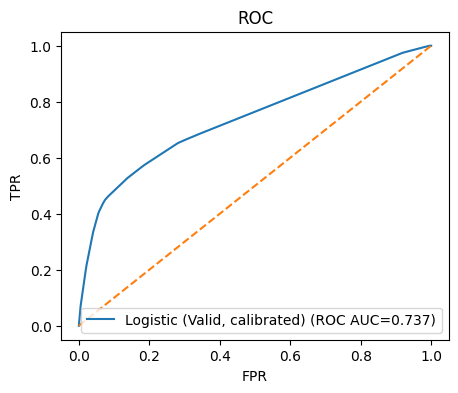

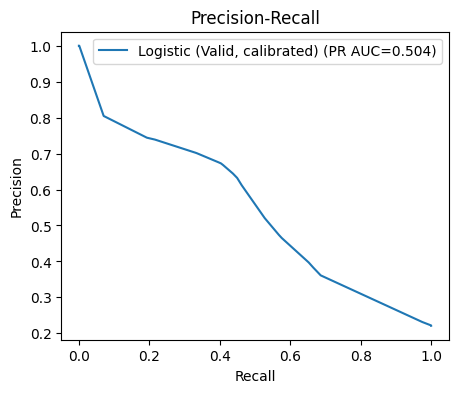

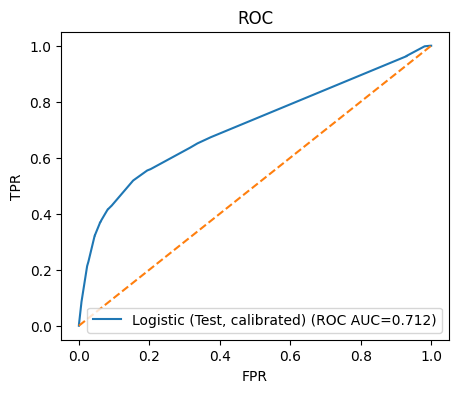

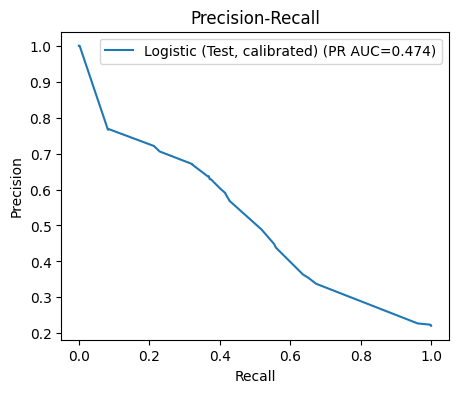

# SUMMARY
{'why_chosen': 'Best PR-AUC on Valid; stable AUC; good Brier after isotonic calibration; linear & interpretable.', 'link_fn': 'Logistic (sigmoid).', 'standardized': 'Yes: StandardScaler (numeric) + OneHotEncoder (categorical).', 'best_params': {'C': 0.01, 'l1_ratio': 1.0}, 'theta_star': 0.088}


In [6]:
# =========================
# CAB330 - Task 3 (Logistic Regression - Elastic Net)
# =========================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from itertools import product
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, roc_auc_score, average_precision_score,
                             brier_score_loss, precision_recall_curve, roc_curve)
from sklearn.calibration import CalibratedClassifierCV

plt.rcParams["figure.figsize"] = (5,4)
SEED = 42

# --------- Helpers / Hàm tiện ích ----------
def metrics_from_proba(y_true, p):
    """Return Accuracy / ROC-AUC / PR-AUC / Brier from probabilities."""
    y_pred = (p >= 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, p),
        "PR_AUC": average_precision_score(y_true, p),
        "Brier": brier_score_loss(y_true, p),
    }

def find_best_threshold_by_cost(y_true, p, c_fn=10.0, c_fp=1.0):
    """Minimize Expected Cost = c_fn*FN + c_fp*FP (grid search over thresholds)."""
    thr = np.linspace(0, 1, 501)
    best_t, best_cost = 0.5, np.inf
    for t in thr:
        y_hat = (p >= t).astype(int)
        FP = ((y_true==0) & (y_hat==1)).sum()
        FN = ((y_true==1) & (y_hat==0)).sum()
        cost = c_fn*FN + c_fp*FP
        if cost < best_cost:
            best_cost, best_t = cost, t
    return float(best_t), float(best_cost)

def plot_roc_pr(y_true, p, label):
    """Plot ROC & PR for quick visual check."""
    # ROC
    fpr,tpr,_ = roc_curve(y_true, p)
    auc = roc_auc_score(y_true, p)
    plt.figure(); plt.plot(fpr,tpr,label=f"{label} (ROC AUC={auc:.3f})")
    plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC"); plt.legend(); plt.show()
    # PR
    prec,rec,_ = precision_recall_curve(y_true, p)
    ap = average_precision_score(y_true, p)
    plt.figure(); plt.plot(rec,prec,label=f"{label} (PR AUC={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall"); plt.legend(); plt.show()

# --------- Columns / Cột dữ liệu ----------
categorical = ['SEX','EDUCATION','MARRIAGE']         # categorical (OHE)
all_cols    = X_train.columns.tolist()
numeric     = [c for c in all_cols if c not in categorical]  # numeric (scaled)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="drop"
)

# =========================================================
# 1) Default Logistic (Elastic Net 50/50), class_weight=balanced
# =========================================================
logit_default = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        solver="saga", penalty="elasticnet",
        l1_ratio=0.5, C=1.0, max_iter=5000,
        class_weight="balanced", n_jobs=-1, random_state=SEED
    ))
])
logit_default.fit(X_train, y_train)

p_tr_def = logit_default.predict_proba(X_train)[:,1]
p_va_def = logit_default.predict_proba(X_valid)[:,1]
p_te_def = logit_default.predict_proba(X_test )[:,1]

print("# Default LR metrics (Train/Valid/Test)")
display(pd.DataFrame(
    [metrics_from_proba(y_train,p_tr_def),
     metrics_from_proba(y_valid,p_va_def),
     metrics_from_proba(y_test ,p_te_def)],
    index=["Train","Valid","Test"]
))

# =========================================================
# 2) Tuned Logistic (Grid nhỏ) – chọn theo PR-AUC on Valid
# =========================================================
grid_C        = [0.01, 0.1, 1, 3, 10]
grid_l1_ratio = [0.0, 0.25, 0.5, 0.75, 1.0]  # 0=L2, 1=L1

best_score, best_cfg, best_model = -1.0, None, None
for C, l1r in product(grid_C, grid_l1_ratio):
    pipe = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", LogisticRegression(
            solver="saga", penalty="elasticnet",
            l1_ratio=l1r, C=C, max_iter=5000,
            class_weight="balanced", n_jobs=-1, random_state=SEED
        ))
    ])
    pipe.fit(X_train, y_train)
    p_valid = pipe.predict_proba(X_valid)[:,1]
    pr_auc  = average_precision_score(y_valid, p_valid)
    if pr_auc > best_score:
        best_score, best_cfg, best_model = pr_auc, {"C":C, "l1_ratio":l1r}, pipe

print(f"# Best by PR-AUC on Valid: {best_cfg} | PR-AUC={best_score:.4f}")

# Metrics for tuned (uncalibrated)
p_tr_t = best_model.predict_proba(X_train)[:,1]
p_va_t = best_model.predict_proba(X_valid)[:,1]
p_te_t = best_model.predict_proba(X_test )[:,1]
print("# Tuned LR metrics (Train/Valid/Test)")
display(pd.DataFrame(
    [metrics_from_proba(y_train,p_tr_t),
     metrics_from_proba(y_valid,p_va_t),
     metrics_from_proba(y_test ,p_te_t)],
    index=["Train","Valid","Test"]
))

# =========================================================
# 3) Calibration (Isotonic) – fit isotonic on Valid
# =========================================================
calibrated = CalibratedClassifierCV(best_model, cv="prefit", method="isotonic")
calibrated.fit(X_valid, y_valid)

p_va_cal = calibrated.predict_proba(X_valid)[:,1]
p_te_cal = calibrated.predict_proba(X_test )[:,1]
print("# Logistic (calibrated) – Valid/Test")
mt_va_cal = metrics_from_proba(y_valid, p_va_cal)
mt_te_cal = metrics_from_proba(y_test , p_te_cal)
display(pd.DataFrame([mt_va_cal, mt_te_cal], index=["Valid","Test"]))

# Cost-optimal threshold (FN:FP = 10:1)
theta_lr, cost_va = find_best_threshold_by_cost(y_valid, p_va_cal, c_fn=10.0, c_fp=1.0)
cost_te = find_best_threshold_by_cost(y_test , p_te_cal, c_fn=10.0, c_fp=1.0)[1]
print(f"# θ* (Valid) = {theta_lr:.3f} | Cost_Valid={int(cost_va)} | Cost_Test={int(cost_te)}")

# =========================================================
# 4) Coefficients / Giải thích biến (top-|coef|)
# =========================================================
ohe = best_model.named_steps["prep"].named_transformers_["cat"]
ohe_names = ohe.get_feature_names_out(categorical)
feat_names = np.r_[numeric, ohe_names]  # order matches ColumnTransformer

coef = best_model.named_steps["clf"].coef_.ravel()
coef_df = (pd.DataFrame({"feature": feat_names, "coef": coef, "abs_coef": np.abs(coef)})
             .sort_values("abs_coef", ascending=False)
             .reset_index(drop=True))
print("# Top-5 |coef| (strongest standardized effects)")
display(coef_df.head(5))

# =========================================================
# 5) Reduced Logistic (dựa trên top-gain từ LightGBM nếu có)
#    Nếu không có fi_gain: fallback chọn 15 biến tương quan đơn biến cao nhất
# =========================================================
try:
    top_feats = fi_gain.index.tolist()[:15]  # from Task 2
    reduced_cols = sorted(set(top_feats + categorical))
except Exception:
    corr = pd.Series(index=all_cols, dtype=float)
    for c in all_cols:
        x = pd.to_numeric(X_train[c], errors='coerce').fillna(0)
        corr[c] = abs(np.corrcoef(x, y_train)[0,1]) if x.std() > 0 else 0.0
    reduced_cols = sorted(set(corr.sort_values(ascending=False).head(15).index.tolist() + categorical))

numeric_r = [c for c in reduced_cols if c not in categorical]
preprocess_r = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), numeric_r),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="drop"
)

lr_reduced = Pipeline(steps=[
    ("prep", preprocess_r),
    ("clf", LogisticRegression(
        solver="saga", penalty="elasticnet",
        l1_ratio=best_cfg["l1_ratio"], C=best_cfg["C"],
        max_iter=5000, class_weight="balanced", n_jobs=-1, random_state=SEED
    ))
])
lr_reduced.fit(X_train[reduced_cols], y_train)
p_va_red = lr_reduced.predict_proba(X_valid[reduced_cols])[:,1]
p_te_red = lr_reduced.predict_proba(X_test [reduced_cols])[:,1]
print("# Reduced LR (uncalibrated) – Valid/Test")
display(pd.DataFrame(
    [metrics_from_proba(y_valid,p_va_red),
     metrics_from_proba(y_test ,p_te_red)],
    index=["Valid","Test"]
))

# =========================================================
# 6) Plots / Biểu đồ cho bản calibrated
# =========================================================
plot_roc_pr(y_valid, p_va_cal, "Logistic (Valid, calibrated)")
plot_roc_pr(y_test , p_te_cal, "Logistic (Test, calibrated)")

# =========================================================
# 7) Summary for report / Tóm tắt để chép vào báo cáo
# =========================================================
summary = {
    "why_chosen": "Best PR-AUC on Valid; stable AUC; good Brier after isotonic calibration; linear & interpretable.",
    "link_fn": "Logistic (sigmoid).",
    "standardized": "Yes: StandardScaler (numeric) + OneHotEncoder (categorical).",
    "best_params": best_cfg,
    "theta_star": round(theta_lr, 3)
}
print("# SUMMARY"); print(summary)


[LightGBM] [Info] Number of positive: 4646, number of negative: 16354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3517
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221238 -> initscore=-1.258466
[LightGBM] [Info] Start training from score -1.258466


,,Accuracy,ROC_AUC,PR_AUC,Brier,theta*,ExpCost
LGBM,Valid,0.774889,0.785941,0.573555,0.169214,0.260000,3124.000000
CatBoost,Valid,0.776667,0.786626,0.572946,0.170638,0.248000,3158.000000
LR_cal,Valid,0.824667,0.736940,0.504421,0.136707,0.088000,3472.000000
LGBM,Test,0.769556,0.782856,0.555635,0.172433,0.260000,3043.000000
CatBoost,Test,0.772444,0.783095,0.563683,0.174409,0.248000,3117.000000
LR_cal,Test,0.812889,0.711525,0.473810,0.143410,0.088000,3460.000000


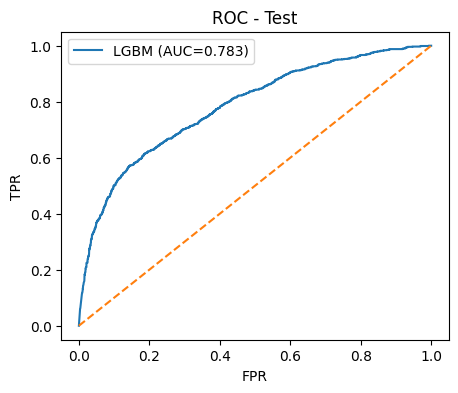

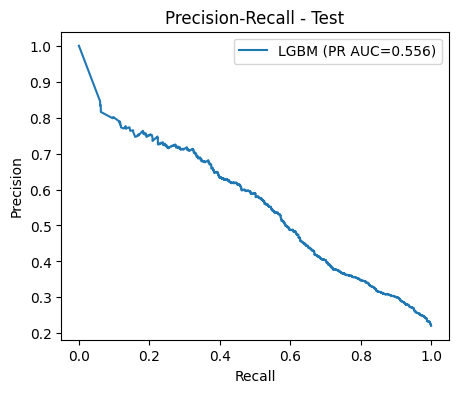

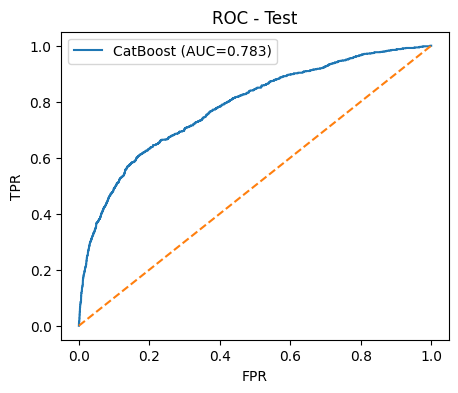

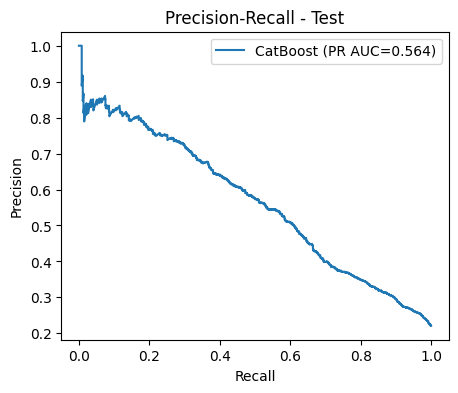

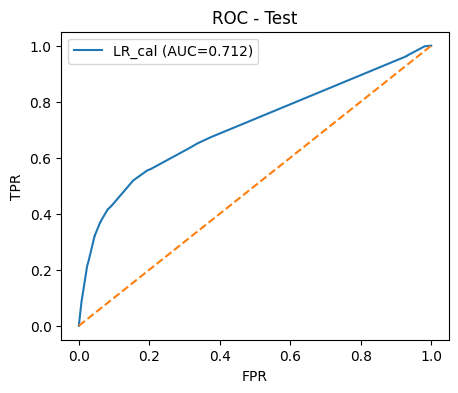

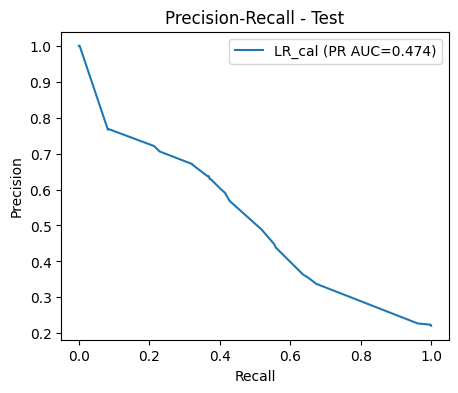


Best on PR-AUC (Test):


,Accuracy,ROC_AUC,PR_AUC,Brier,theta*,ExpCost
CatBoost,0.772444,0.783095,0.563683,0.174409,0.248000,3117.000000


Models loaded from: /content/drive/MyDrive/[251EIM401402]MachineLearning-GroupNYTDT/NYTDT_SourceCode/models_compare


In [12]:
# =========================
# Task 4 — Restore & Compare (LR vs LGBM vs CatBoost)
# Không GridSearch lại; ưu tiên load mô hình đã lưu
# =========================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib, os
from pathlib import Path
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    brier_score_loss, precision_recall_curve, roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import lightgbm as lgb

try:
    from catboost import CatBoostClassifier
    HAVE_CB = True
except Exception:
    HAVE_CB = False

plt.rcParams["figure.figsize"] = (5,4)
pd.set_option("display.float_format", lambda x: f"{x:.6f}")

# --- Define paths and models dictionary ---
MODEL_DIR = Path(ROOT) / "models_compare"
MODEL_DIR.mkdir(exist_ok=True) # Ensure directory exists

paths = {
    "LGBM": MODEL_DIR / "lgbm_model.pkl",
    "CatBoost": MODEL_DIR / "catboost_model.pkl",
    "LR_cal": MODEL_DIR / "lr_cal_model.pkl",
}
models = {}
# -----------------------------------------

# ---------- helper ----------
def metrics_from_proba(y_true, p):
    y_pred = (p >= 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, p),
        "PR_AUC": average_precision_score(y_true, p),
        "Brier": brier_score_loss(y_true, p)
    }

def find_best_threshold_by_cost(y_true, p, c_fn=10.0, c_fp=1.0):
    thr = np.linspace(0,1,501)
    best_t, best_cost = 0.5, np.inf
    for t in thr:
        y_hat = (p >= t).astype(int)
        FP = ((y_true==0) & (y_hat==1)).sum()
        FN = ((y_true==1) & (y_hat==0)).sum()
        cost = c_fn*FN + c_fp*FP
        if cost < best_cost:
            best_cost, best_t = cost, t
    return float(best_t), float(best_cost)

def plot_roc_pr(y_true, p, label):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, p)
    auc = roc_auc_score(y_true, p)
    plt.figure(); plt.plot(fpr, tpr, label=f"{label} (AUC={auc:.3f})")
    plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC"); plt.legend(); plt.show()
    # PR
    prec, rec, _ = precision_recall_curve(y_true, p)
    ap = average_precision_score(y_true, p)
    plt.figure(); plt.plot(rec, prec, label=f"{label} (PR AUC={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall"); plt.legend(); plt.show()


# 1A) LightGBM
if Path(paths["LGBM"]).exists():
    models["LGBM"] = joblib.load(paths["LGBM"])
else:
    # train nhanh (không GridSearch) để có số liệu Task 4
    pos = int(y_train.sum()); neg = len(y_train) - pos
    scale_pos_weight = neg / max(pos,1)
    lgb_fast = lgb.LGBMClassifier(
        objective="binary", learning_rate=0.05, n_estimators=1000,
        num_leaves=31, min_child_samples=20, subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight, metric="None"
    )
    lgb_fast.fit(X_train, y_train,
                 eval_set=[(X_valid, y_valid)],
                 eval_metric="auc",
                 callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)])
    models["LGBM"] = lgb_fast
    joblib.dump(lgb_fast, paths["LGBM"])

# 1B) CatBoost
if HAVE_CB and Path(paths["CatBoost"]).exists():
    models["CatBoost"] = joblib.load(paths["CatBoost"])
elif HAVE_CB:
    # train nhanh baseline (ít iterations); nếu bạn không muốn train, bỏ qua phần này
    pos = int(y_train.sum()); neg = len(y_train) - pos
    cb = CatBoostClassifier(
        loss_function="Logloss", eval_metric="AUC", verbose=False,
        class_weights=[1.0, neg/max(pos,1)], random_seed=42,
        depth=6, learning_rate=0.06, iterations=600
    )
    cb.fit(X_train, y_train, eval_set=(X_valid, y_valid),
           use_best_model=True, early_stopping_rounds=100, verbose=False)
    models["CatBoost"] = cb
    joblib.dump(cb, paths["CatBoost"])
else:
    print("⚠️ CatBoost chưa cài / không khả dụng — sẽ bỏ qua model này trong so sánh.")

# 1C) Logistic (calibrated)
if Path(paths["LR_cal"]).exists():
    lr_cal = joblib.load(paths["LR_cal"])
    models["LR_cal"] = lr_cal
else:
    # dựng lại pipeline nhanh (dùng best params phổ biến từ Task 3: C=0.01, l1_ratio=1.0)
    preprocess = ColumnTransformer([
        ("num", StandardScaler(with_mean=False), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ], remainder="drop")
    lr = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", LogisticRegression(
            solver="saga", penalty="elasticnet",
            l1_ratio=1.0, C=0.01, max_iter=5000,
            class_weight="balanced", n_jobs=-1, random_state=42
        ))
    ])
    lr.fit(X_train, y_train)
    lr_cal = CalibratedClassifierCV(lr, method="isotonic", cv="prefit")
    lr_cal.fit(X_valid, y_valid)
    models["LR_cal"] = lr_cal
    joblib.dump(lr_cal, paths["LR_cal"])

assert models, "Không có mô hình nào để so sánh."

# ---------- 2) Metrics + Expected Cost ----------
C_FN, C_FP = 10.0, 1.0
rows_valid, rows_test = [], []
probas_test = {}

for name, mdl in models.items():
    # predict_proba cho Valid/Test
    p_va = mdl.predict_proba(X_valid)[:,1]
    p_te = mdl.predict_proba(X_test )[:,1]
    probas_test[name] = p_te

    # Metrics
    m_va = metrics_from_proba(y_valid, p_va)
    m_te = metrics_from_proba(y_test , p_te)
    # Cost threshold theo Valid
    th, c_va = find_best_threshold_by_cost(y_valid, p_va, C_FN, C_FP)
    _,  c_te = find_best_threshold_by_cost(y_test , p_te, C_FN, C_FP)
    m_va.update({"theta*": th, "ExpCost": c_va})
    m_te.update({"theta*": th, "ExpCost": c_te})

    rows_valid.append(pd.Series(m_va, name=(name,"Valid")))
    rows_test.append(pd.Series(m_te,  name=(name,"Test")))

metrics_tbl = pd.DataFrame(rows_valid + rows_test)
display(metrics_tbl)

# ---------- 3) ROC/PR trên Test ----------
for name, p in probas_test.items():
    # ROC
    fpr, tpr, _ = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.figure(); plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - Test"); plt.legend(); plt.show()
    # PR
    prec, rec, _ = precision_recall_curve(y_test, p)
    ap = average_precision_score(y_test, p)
    plt.figure(); plt.plot(rec, prec, label=f"{name} (PR AUC={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall - Test"); plt.legend(); plt.show()

# ---------- 4) Kết luận nhanh (in text) ----------
best_by_pr = metrics_tbl.xs("Test", level=1).sort_values("PR_AUC", ascending=False).head(1)
print("\nBest on PR-AUC (Test):")
display(best_by_pr)

print(f"Models loaded from: {MODEL_DIR}")
